In [1]:
from sklearn.model_selection import train_test_split
from creating_classes import load_data
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
train_folders = ['zero_train', 'one_train', 'two_train', 'three_train', 'four_train', 'five_train']
test_folders = ['zero_test', 'one_test', 'two_test', 'three_test', 'four_test', 'five_test']

X_train, y_train = load_data(train_folders)
X_test, y_test = load_data(test_folders)

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [3]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 128)               1572992   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 1,583,526
Trainable params: 1,583,526
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
450/450 [==============================] - 8s 16ms/step - loss: 0.2923 - accuracy: 0.9104 - val_loss: 0.0368 - val_accuracy: 0.9922
Epoch 2/20
450/450 [==============================] - 8s 18ms/step - loss: 0.0296 - accuracy: 0.9928 - val_loss: 0.0275 - val_accuracy: 0.9914
Epoch 3/20
450/450 [==============================] - 9s 21ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0041 - val_accuracy: 0.9997
Epoch 4/20
450/450 [==============================] - 6s 14ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0066 - val_accuracy: 0.9983
Epoch 5/20
450/450 [==============================] - 7s 15ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0105 - val_accuracy: 0.9969


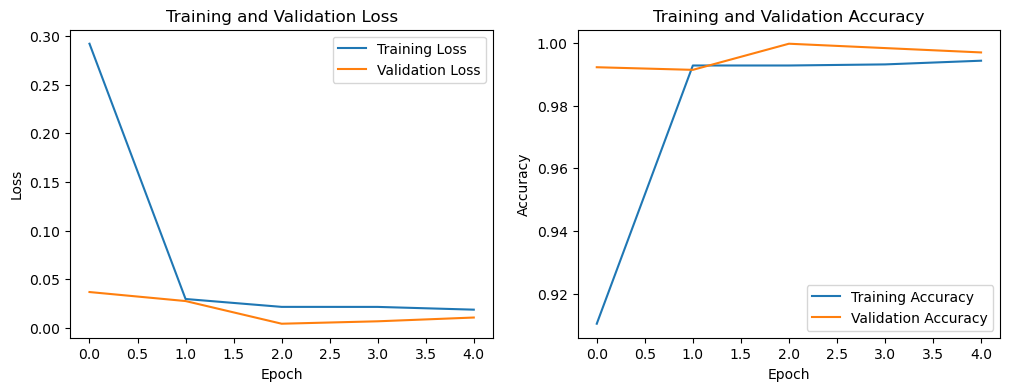

In [4]:
from keras.callbacks import EarlyStopping

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=EarlyStopping("val_loss", patience=2, restore_best_weights=True))

plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [5]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

113/113 [==============================] - 1s 11ms/step - loss: 0.0059 - accuracy: 0.9978
Test accuracy: 99.78%


In [6]:
model.save('model.h5')